# CODE TO PREDICT STOCK MARKET PRICE

# TASK #1: LIBRARIES KEY LIBRARIES AND DATASETS 

In [2]:
# This dataset is created for prediction of the S&P 500 stock index based on interest rates and employment numbers.
# import key libraries and datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [5]:
stock = pd.read_csv('S&P500_Stock_Data.csv')


In [6]:
stock.head(10)

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
5,2.143637,56.060598,2187.344909
6,2.148647,51.513208,2263.049249
7,2.176184,53.475909,2281.496374
8,2.125352,63.668422,2355.163011
9,2.225682,56.993396,2326.330337


In [7]:
stock.tail()

,Interest Rates,Employment,S&P 500 Price
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981
999,2.180638,46.297034,2156.133786


In [8]:
stock.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764328
max,3.000000,70.000000,3000.000000


In [9]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


# TASK #2: PERFORM DATA VISUALIZATION

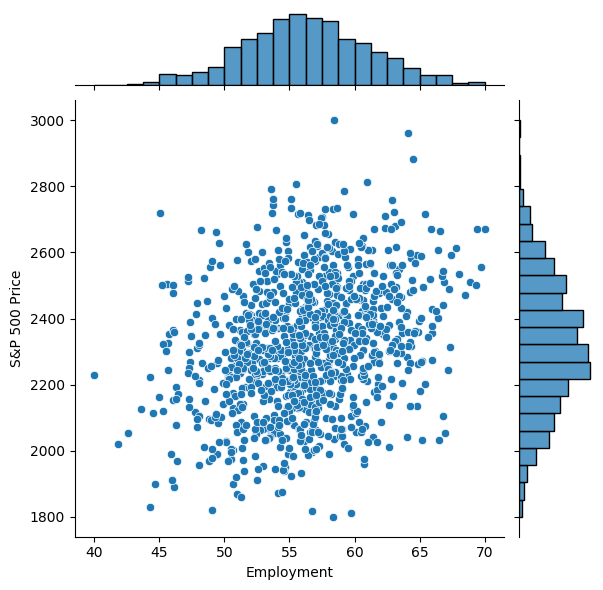

In [10]:
sns.jointplot(x='Employment', y='S&P 500 Price', data=stock)

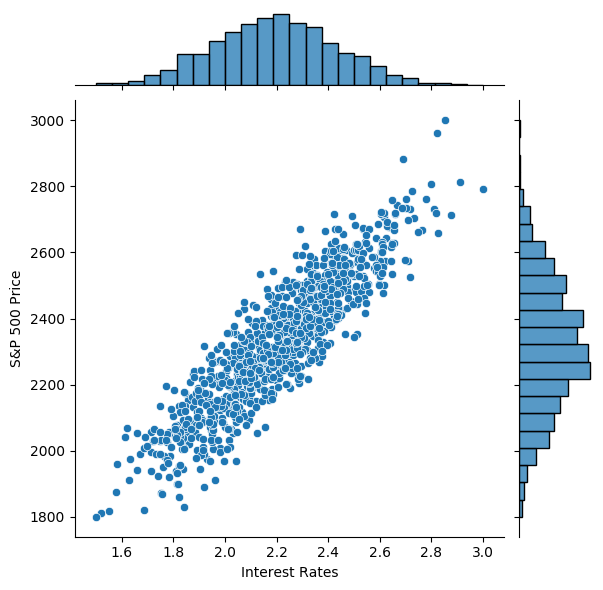

In [11]:
sns.jointplot(x='Interest Rates', y='S&P 500 Price',data=stock)

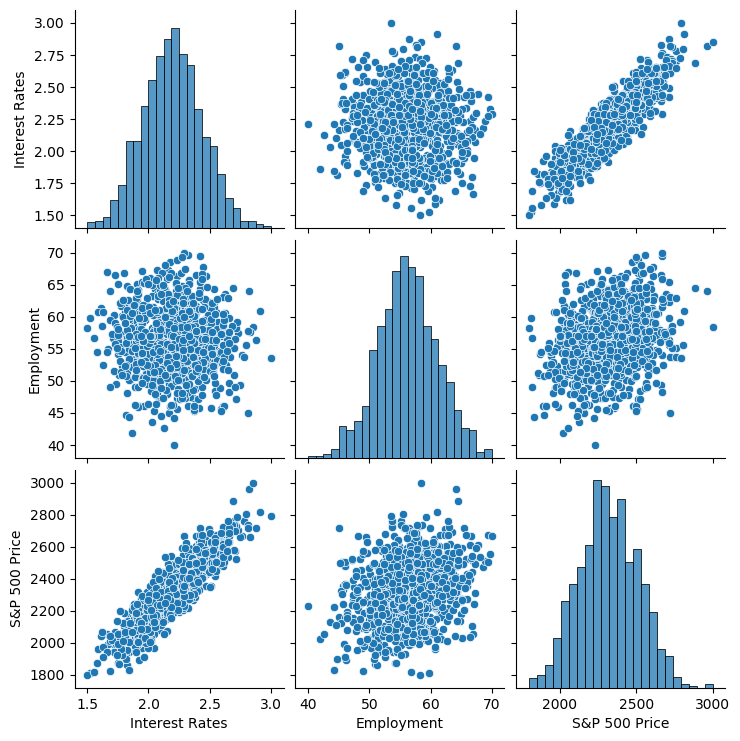

In [12]:
sns.pairplot(stock)

# TASK #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [16]:
y = stock['S&P 500 Price']

In [17]:
X = stock[['Interest Rates', 'Employment']]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# TASK #4: TRAIN AND EVALUATE THE MACHINE LEARNING MODEL

In [21]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [726.78254393  12.38240767]
Linear Model Coefficient (b):  28.891651922509936


In [27]:
y_predict = regressor.predict(X_test)
y_predict

array([2581.91655805, 2363.22244592, 1976.06801768, 2074.81840293,
       2389.81073518, 2224.85520387, 2351.98476171, 2514.20333615,
       2556.35040994, 2150.32467175, 2279.04293021, 2185.0998079 ,
       2602.21324789, 2331.13889021, 2294.58397035, 2572.42297494,
       2189.64967222, 2371.85432109, 2365.07594434, 2505.28022022,
       2287.85426646, 2435.28538662, 2366.26017466, 2246.77764773,
       2165.55402322, 1996.17155998, 1863.16662852, 2278.82350044,
       2403.17591866, 2422.87892574, 2486.7773022 , 2474.11392321,
       2446.63130571, 2373.44547144, 2195.31678207, 2432.76723271,
       2276.9130147 , 2367.96212454, 2578.35451049, 2416.77407962,
       2048.34006793, 2579.69295305, 2487.60264265, 2220.85155544,
       2115.63655608, 1975.45310116, 2673.50229086, 2369.05996626,
       2513.97895157, 1930.44458631, 2239.67632824, 2055.28507265,
       2397.35791086, 2646.94774217, 2585.79112784, 2369.08368886,
       2377.1369227 , 2446.28066823, 2325.3794507 , 2198.38894

In [28]:
y_test

228    2555.649348
317    2514.830249
993    1922.893274
183    2089.128863
203    2408.579162
          ...     
274    2587.525938
436    2354.905933
290    2009.165061
982    2508.751044
554    2072.532283
Name: S&P 500 Price, Length: 200, dtype: float64

Text(0.5, 1.0, 'Linear Regression Predictions')

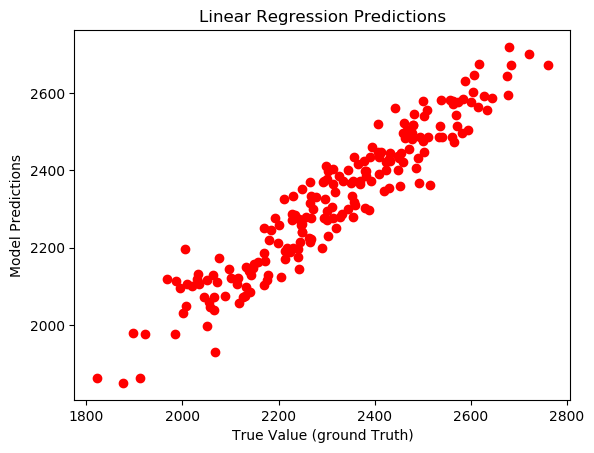

In [29]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel("Model Predictions")
plt.xlabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')

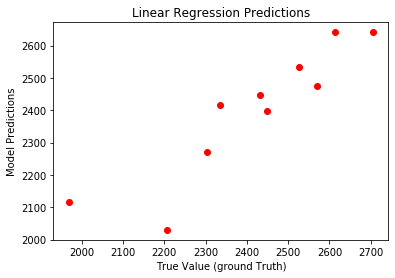

In [30]:
k = X_test.shape[1]
n = len(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - y_predict) / y_test )) * 100

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =', MAPE, '%') 


RMSE = 58.397 
MSE = 3410.1637954655826 
MAE = 47.40886881051671 
R2 = 0.9077615450942891 
Adjusted R2 = 0.9068251140800179 
Mean Absolute Percentage Error = 2.079383268703732 %


# TASK #5: VISUALIZE THE RESULTS in 3D

In [31]:
from mpl_toolkits.mplot3d import Axes3D

x_surf, y_surf = np.meshgrid(np.linspace(stock['Interest Rates'].min(), stock['Interest Rates'].max(), 100),np.linspace(stock['Employment'].min(), stock['Employment'].max(), 100))
x_surf.shape

(100, 100)

In [32]:
y_surf.shape

(100, 100)

In [33]:
onlyX = pd.DataFrame({'Interest Rates': x_surf.ravel(), 'Employment': y_surf.ravel()})
onlyX.shape

(10000, 2)

In [34]:
fittedY = regressor.predict(onlyX)
fittedY.shape

(10000,)

In [35]:
fittedY = fittedY.reshape(x_surf.shape)
fittedY.shape

(100, 100)

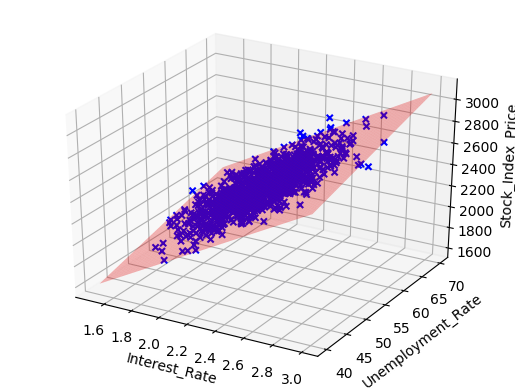

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'],c='blue', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
plt.show()

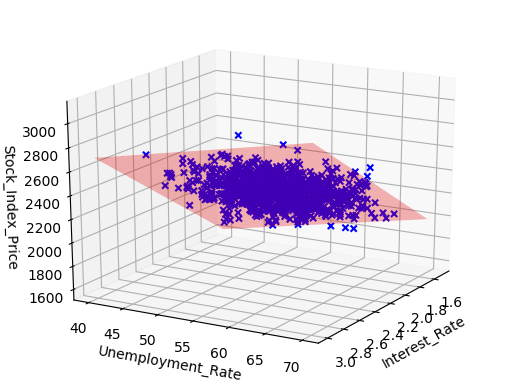

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'],c='blue', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
ax.view_init(20, 30)
plt.show()

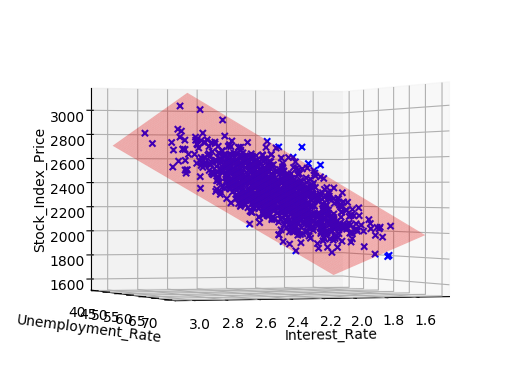

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'],c='blue', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
ax.view_init(0, 70)
plt.show()

In [39]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Interest Rates,726.782544
Employment,12.382408


# EXCELLENT JOB!